## Exploratory Data Analysis

### Table of contents
1. Before Covid
 * Daily trend
 * Monthly trend
2. During Covid
 * Daily trend
 * Monthly trend
3. Before Lockdown
 * Daily trend
 * Monthly trend
4. During Lockdown
 * Daily trend
 * Monthly trend
5. After Lockdown
 * Daily trend
 * Monthly trend


#### Importing the necessary libraries

In [4]:
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
#!conda install -c conda-forge -y wordcloud
from wordcloud import WordCloud, STOPWORDS
import seaborn as sns

from datetime import datetime

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.3
  latest version: 4.8.5

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/gerald/anaconda3/envs/food_quality

  added / updated specs:
    - wordcloud


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.6.20  |       hecda079_0         145 KB  conda-forge
    certifi-2020.6.20          |   py38h32f6830_0         151 KB  conda-forge
    cycler-0.10.0              |             py_2           9 KB  conda-forge
    freetype-2.10.2            |       he06d7ca_0         905 KB  conda-forge
    jpeg-9d                    |       h516909a_0         266 KB  conda-forge
    kiwisolver-1.2.0           |   py38hbf85e49_0          87 KB  conda-forge
    lcms2-2.11                 |       hbd6801e_0  

In [5]:
# Function Definitions

In [33]:
def datetime(data):
    data.created_at = pd.to_datetime(data.created_at)
    return data

def season(dataframe):
    data = dataframe[['text', 'created_at']]
    trend = data.groupby("created_at").agg({'text':'count'})
    return trend

def plot_cloud(text):
    wordcloud = WordCloud(width = 3000, height = 2000, 
                          random_state=1, background_color='salmon', 
                          colormap='Pastel1', collocations=False, 
                          stopwords = STOPWORDS)
    wordcloud2 = WordCloud().generate(' '.join(text))
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud2) 
    # No axis details
    plt.axis("off")

## Before Covid

In [34]:
before_covid_KENYA = pd.read_csv("before_covid_KENYA.csv")
before_covid_Nigeria = pd.read_csv("before_covid_Nigeria.csv")
before_covid_SA = pd.read_csv("before_covid_SA.csv")

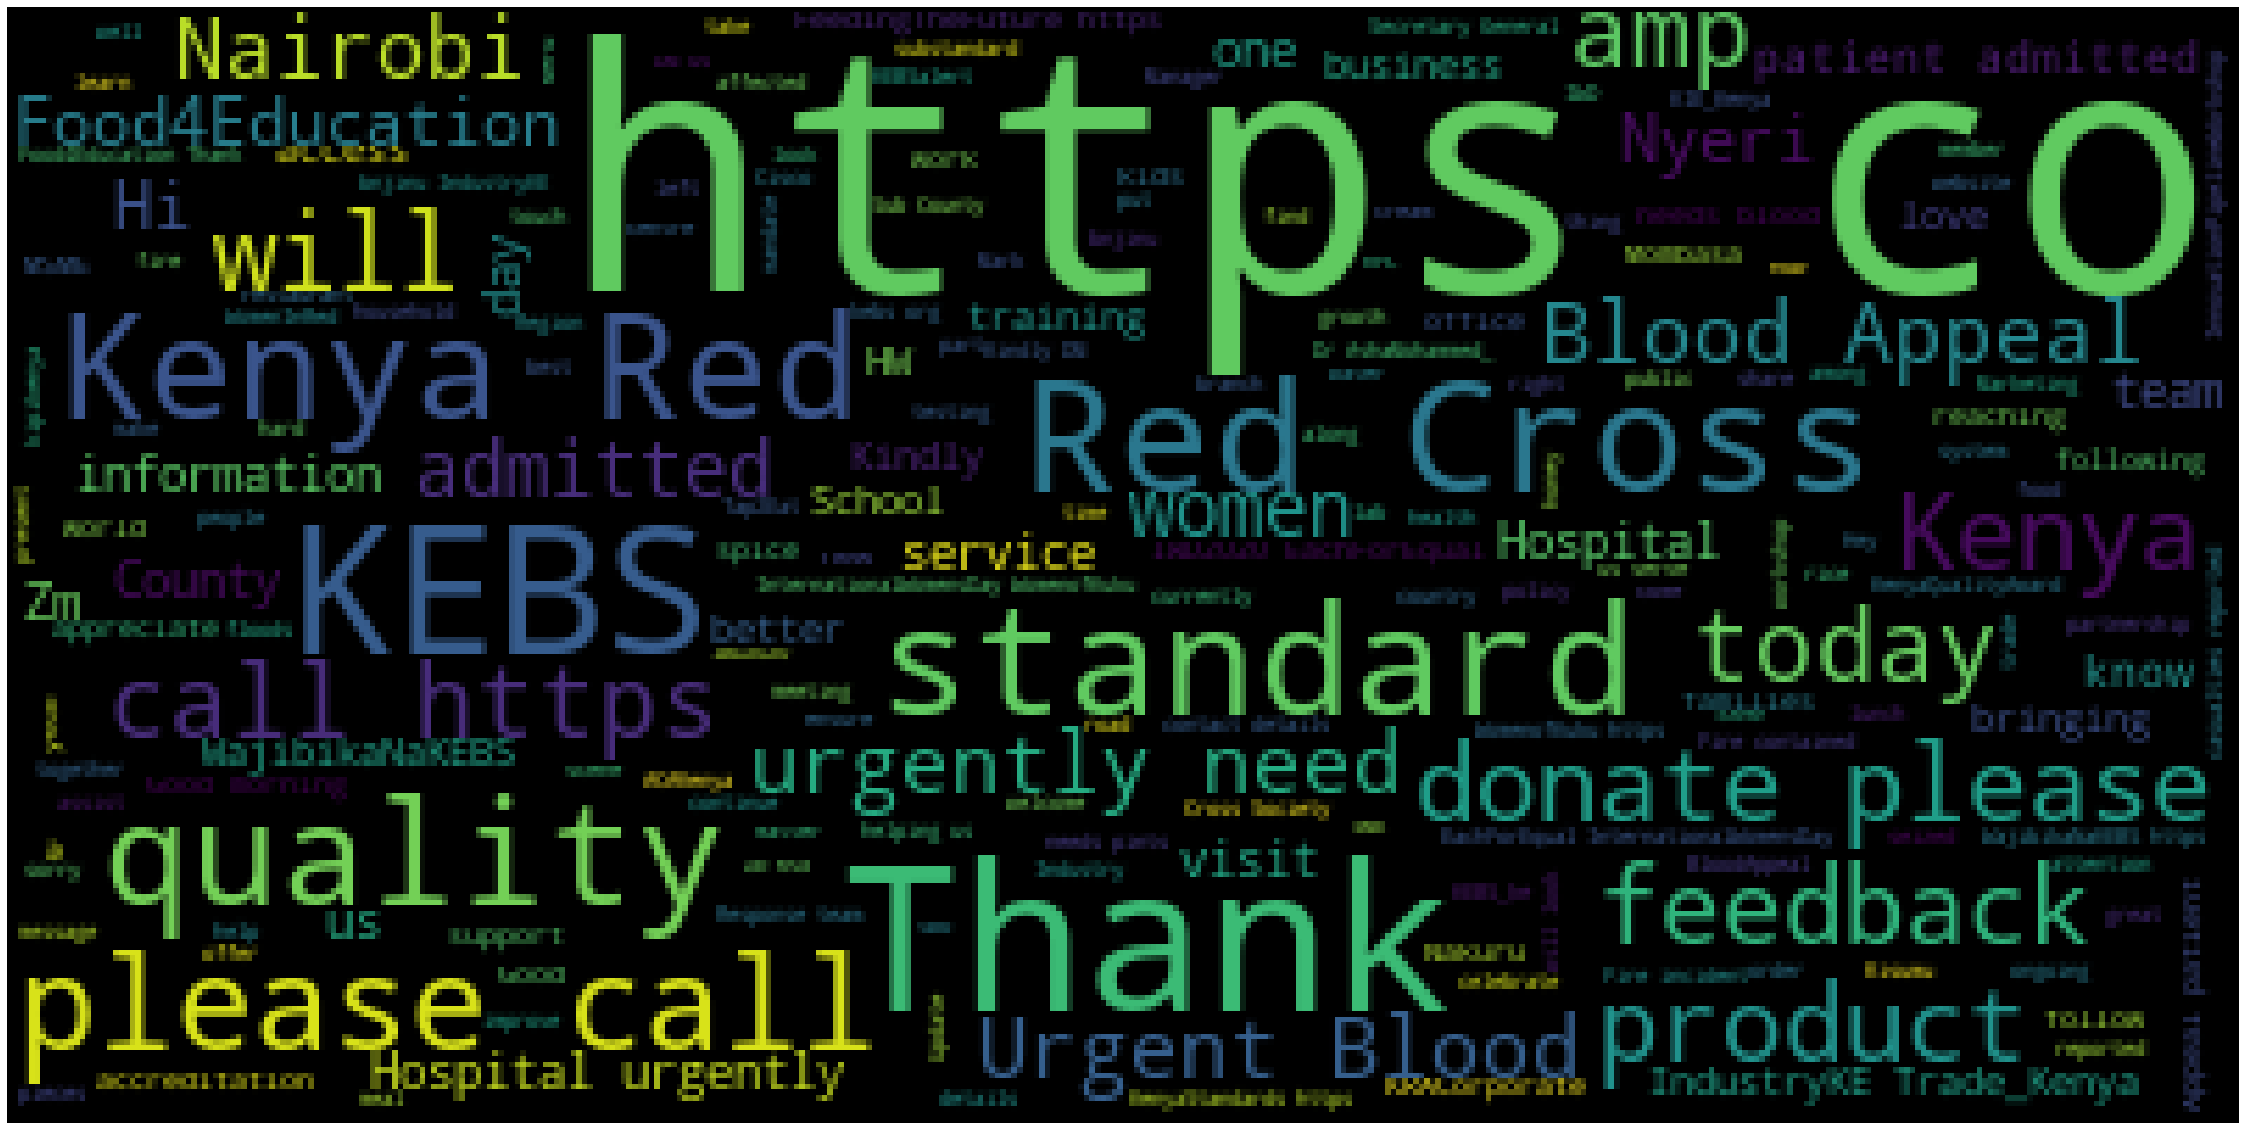

In [35]:
plot_cloud(before_covid_KENYA['text'])

### Seasonality in tweets

In [8]:
#Conversion of created_at to date time.
#concatenated_df.created_at = pd.to_datetime(concatenated_df.created_at)
before_covid_KENYA = datetime(before_covid_KENYA)
before_covid_Nigeria = datetime(before_covid_Nigeria)
before_covid_SA = datetime(before_covid_SA)

In [9]:
##trend of number of tweets
kenya_trend = season(before_covid_KENYA)
sa_trend = season(before_covid_SA)

### Daily Trend

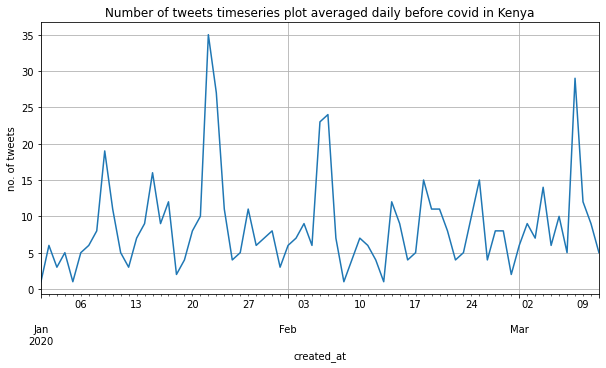

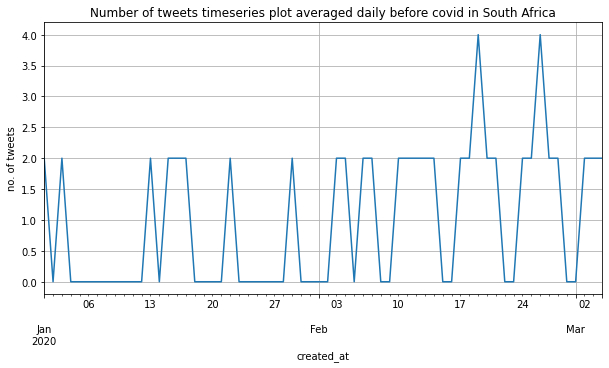

In [10]:
# daily trend_Kenya
daily_time_data = kenya_trend.text.resample('D').sum() 
plt.figure(figsize = (10,5))
plt.title('Number of tweets timeseries plot averaged daily before covid in Kenya')
plt.ylabel('no. of tweets')
daily_time_data.plot()
plt.grid()

# daily trend_SA
daily_time_data = sa_trend.text.resample('D').sum() 
plt.figure(figsize = (10,5))
plt.title('Number of tweets timeseries plot averaged daily before covid in South Africa')
plt.ylabel('no. of tweets')
daily_time_data.plot()
plt.grid()

### Monthly trend

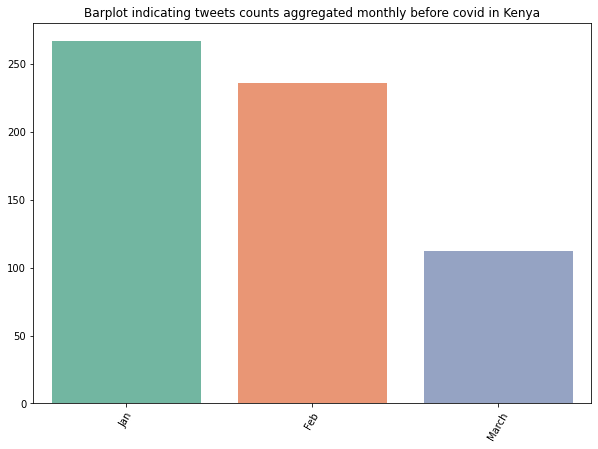

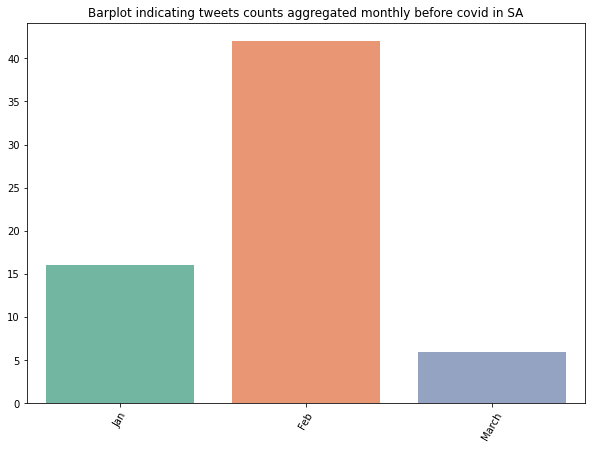

In [11]:
# number of tweets mothly aggregation using barplots
#Kenya
kenya_monthly_time_data = kenya_trend.text.resample('M').sum() 
plt.figure(figsize = (10, 7))
kenya_monthly_time_data.months = ['Jan', 'Feb', 'March']
plt.xticks(rotation= 60)
sns.barplot(x = kenya_monthly_time_data.months, y = kenya_monthly_time_data.values, palette = 'Set2').set_title('Barplot indicating tweets counts aggregated monthly before covid in Kenya')
plt.show()
#South Africa
sa_monthly_time_data = sa_trend.text.resample('M').sum() 
plt.figure(figsize = (10, 7))
sa_monthly_time_data.months = ['Jan', 'Feb', 'March']
plt.xticks(rotation= 60)
sns.barplot(x = sa_monthly_time_data.months, y = sa_monthly_time_data.values, palette = 'Set2').set_title('Barplot indicating tweets counts aggregated monthly before covid in SA')
plt.show()

## During Covid

In [12]:
#reading data
during_covid_KENYA = pd.read_csv("during_covid_KENYA.csv")
during_covid_Nigeria = pd.read_csv("during_covid_Nigeria.csv")
during_covid_SA = pd.read_csv("during_covid_SA.csv")


#converting created at to date time
during_covid_KENYA = datetime(during_covid_KENYA)
during_covid_Nigeria = datetime(during_covid_Nigeria)
during_covid_SA = datetime(during_covid_SA)

#Computing trend.
kenya_trend = season(during_covid_KENYA)
nigeria_trend = season(during_covid_Nigeria)
sa_trend = season(during_covid_SA)

### Daily Trend

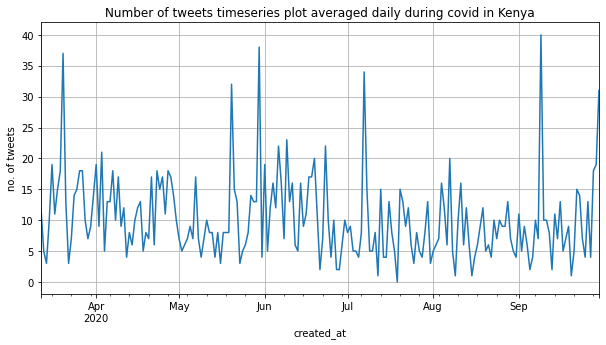

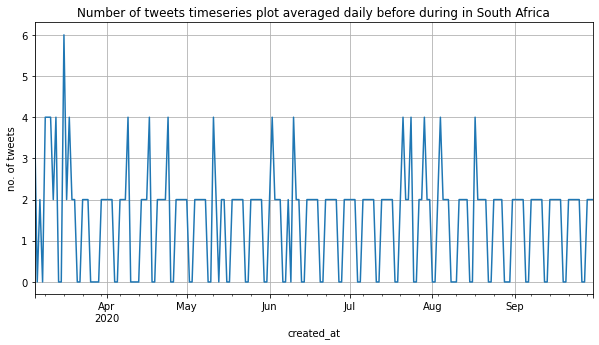

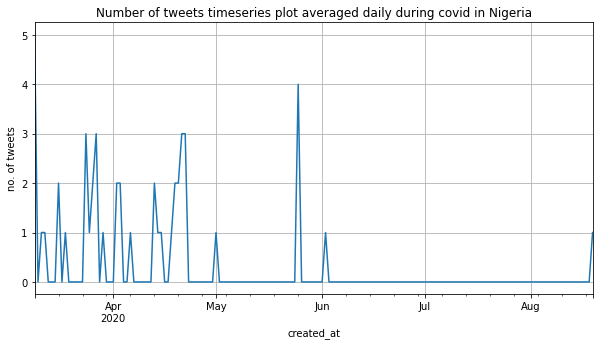

In [13]:
# daily trend_Kenya
daily_time_data = kenya_trend.text.resample('D').sum() 
plt.figure(figsize = (10,5))
plt.title('Number of tweets timeseries plot averaged daily during covid in Kenya')
plt.ylabel('no. of tweets')
daily_time_data.plot()
plt.grid()

# daily trend_SA
daily_time_data = sa_trend.text.resample('D').sum() 
plt.figure(figsize = (10,5))
plt.title('Number of tweets timeseries plot averaged daily before during in South Africa')
plt.ylabel('no. of tweets')
daily_time_data.plot()
plt.grid()

# daily trend_Nigeria
daily_time_data = nigeria_trend.text.resample('D').sum() 
plt.figure(figsize = (10,5))
plt.title('Number of tweets timeseries plot averaged daily during covid in Nigeria')
plt.ylabel('no. of tweets')
daily_time_data.plot()
plt.grid()

### Monthly Trend

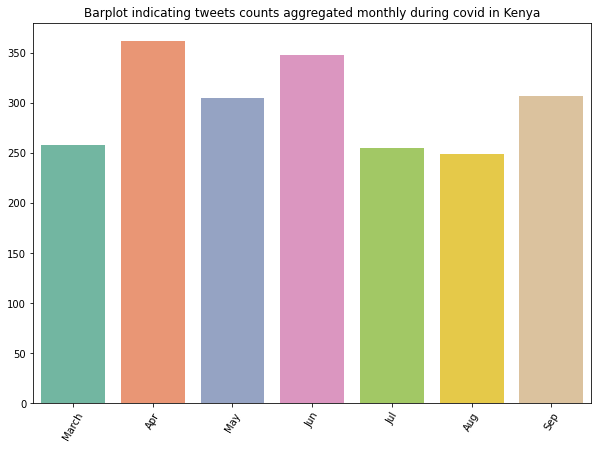

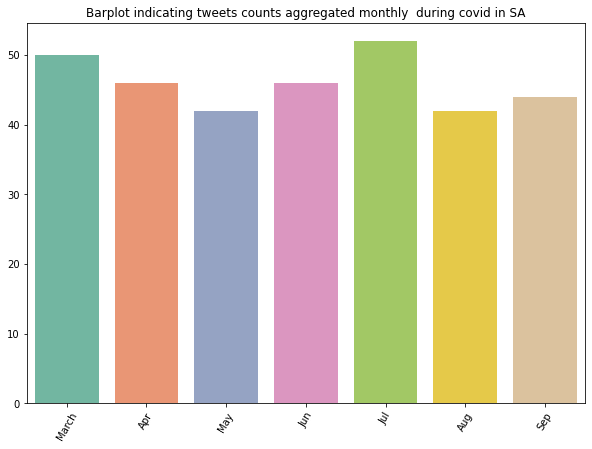

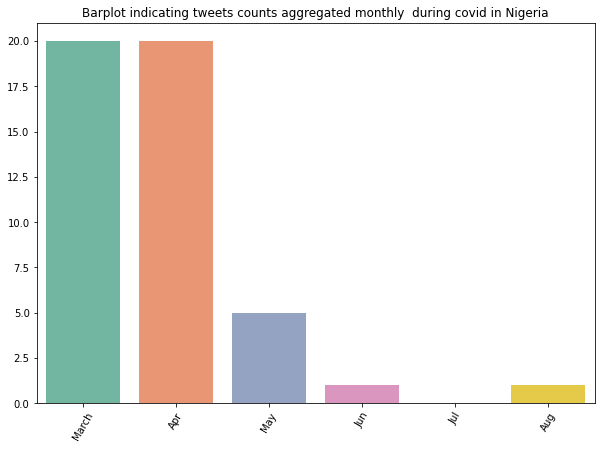

In [14]:
# number of tweets mothly aggregation using barplots
#Kenya
kenya_monthly_time_data = kenya_trend.text.resample('M').sum() 
plt.figure(figsize = (10, 7))
kenya_monthly_time_data.months = ['March','Apr',"May","Jun","Jul","Aug","Sep"]
plt.xticks(rotation= 60)
sns.barplot(x = kenya_monthly_time_data.months, y = kenya_monthly_time_data.values, palette = 'Set2').set_title('Barplot indicating tweets counts aggregated monthly during covid in Kenya')
plt.show()
#South Africa
sa_monthly_time_data = sa_trend.text.resample('M').sum() 
plt.figure(figsize = (10, 7))
sa_monthly_time_data.months = ['March','Apr',"May","Jun","Jul","Aug","Sep"]
plt.xticks(rotation= 60)
sns.barplot(x = sa_monthly_time_data.months, y = sa_monthly_time_data.values, palette = 'Set2').set_title('Barplot indicating tweets counts aggregated monthly  during covid in SA')
plt.show()
#Nigeria
nigeria_monthly_time_data = nigeria_trend.text.resample('M').sum() 
plt.figure(figsize = (10, 7))
nigeria_monthly_time_data.months = ['March','Apr',"May","Jun","Jul","Aug"]
plt.xticks(rotation= 60)
sns.barplot(x = nigeria_monthly_time_data.months, y = nigeria_monthly_time_data.values, palette = 'Set2').set_title('Barplot indicating tweets counts aggregated monthly  during covid in Nigeria')
plt.show()

## Before lockdown

In [15]:
before_lockdown_KENYA = pd.read_csv("before_lockdown_KENYA.csv")
before_lockdown_Nigeria = pd.read_csv("before_lockdown_Nigeria.csv")
before_lockdown_SA = pd.read_csv("before_lockdown_SA.csv")

#converting created at to date time
before_lockdown_KENYA = datetime(before_lockdown_KENYA)
before_lockdown_Nigeria = datetime(before_lockdown_Nigeria)
before_lockdown_SA = datetime(before_lockdown_SA)

### Daily Trend

In [16]:
#Computing trend.
kenya_trend = season(before_lockdown_KENYA)
nigeria_trend = season(before_lockdown_Nigeria)
sa_trend = season(before_lockdown_SA)

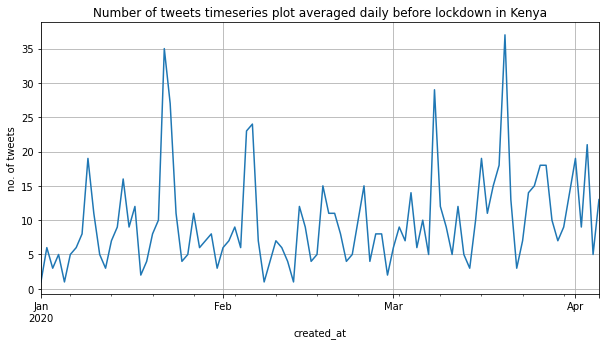

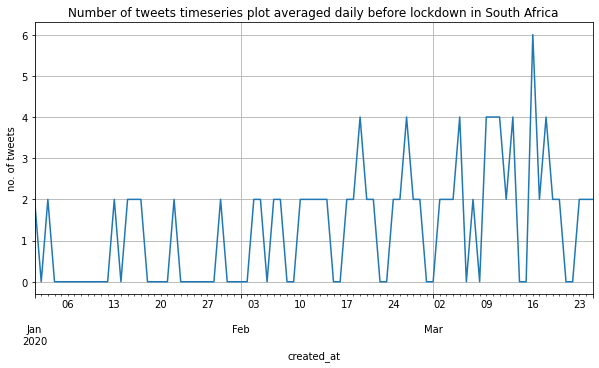

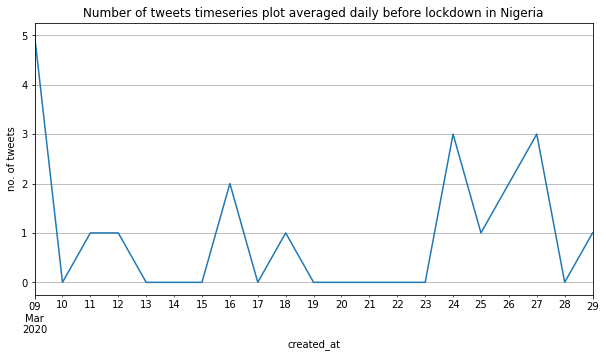

In [17]:
# daily trend_Kenya
daily_time_data = kenya_trend.text.resample('D').sum() 
plt.figure(figsize = (10,5))
plt.title('Number of tweets timeseries plot averaged daily before lockdown in Kenya')
plt.ylabel('no. of tweets')
daily_time_data.plot()
plt.grid()

# daily trend_SA
daily_time_data = sa_trend.text.resample('D').sum() 
plt.figure(figsize = (10,5))
plt.title('Number of tweets timeseries plot averaged daily before lockdown in South Africa')
plt.ylabel('no. of tweets')
daily_time_data.plot()
plt.grid()

# daily trend_Nigeria
daily_time_data = nigeria_trend.text.resample('D').sum() 
plt.figure(figsize = (10,5))
plt.title('Number of tweets timeseries plot averaged daily before lockdown in Nigeria')
plt.ylabel('no. of tweets')
daily_time_data.plot()
plt.grid()

### Monthly trend

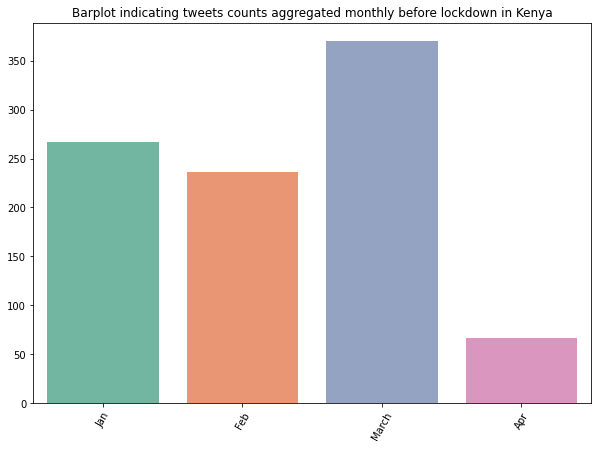

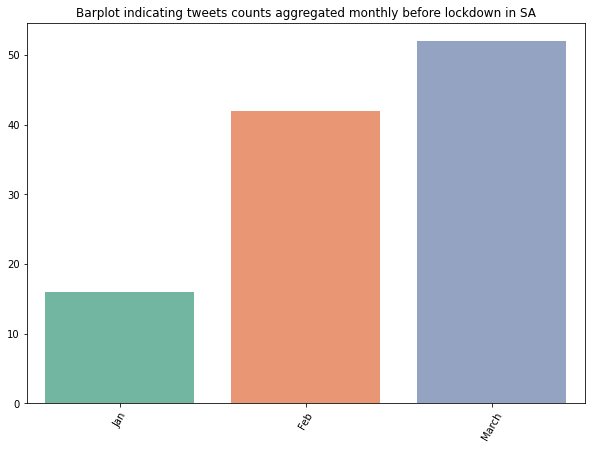

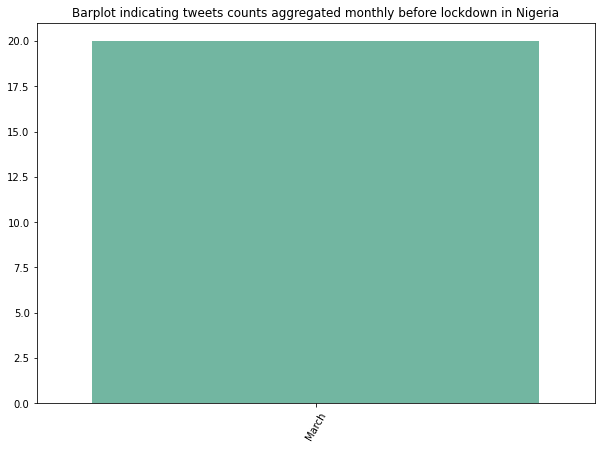

In [18]:
# number of tweets mothly aggregation using barplots
#Kenya
kenya_monthly_time_data = kenya_trend.text.resample('M').sum() 
plt.figure(figsize = (10, 7))
kenya_monthly_time_data.months = ['Jan', 'Feb', 'March','Apr']
plt.xticks(rotation= 60)
sns.barplot(x = kenya_monthly_time_data.months, y = kenya_monthly_time_data.values, palette = 'Set2').set_title('Barplot indicating tweets counts aggregated monthly before lockdown in Kenya')
plt.show()
#South Africa
sa_monthly_time_data = sa_trend.text.resample('M').sum() 
plt.figure(figsize = (10, 7))
sa_monthly_time_data.months = ['Jan', 'Feb', 'March']
plt.xticks(rotation= 60)
sns.barplot(x = sa_monthly_time_data.months, y = sa_monthly_time_data.values, palette = 'Set2').set_title('Barplot indicating tweets counts aggregated monthly before lockdown in SA')
plt.show()
#Nigeria
nigeria_monthly_time_data = nigeria_trend.text.resample('M').sum() 
plt.figure(figsize = (10, 7))
nigeria_monthly_time_data.months = [ 'March']
plt.xticks(rotation= 60)
sns.barplot(x = nigeria_monthly_time_data.months, y = nigeria_monthly_time_data.values, palette = 'Set2').set_title('Barplot indicating tweets counts aggregated monthly before lockdown in Nigeria')
plt.show()

## During lockdown

In [19]:
during_lockdown_KENYA = pd.read_csv("during_lockdown_KENYA.csv")
during_lockdown_Nigeria = pd.read_csv("during_lockdown_Nigeria.csv")
during_lockdown_SA = pd.read_csv("during_lockdown_SA.csv")

#converting created at to date time
during_lockdown_KENYA = datetime(during_lockdown_KENYA)
during_lockdown_Nigeria = datetime(during_lockdown_Nigeria)
during_lockdown_SA = datetime(during_lockdown_SA)

#Computing trend.
kenya_trend = season(during_lockdown_KENYA)
nigeria_trend = season(during_lockdown_Nigeria)
sa_trend = season(during_lockdown_SA)

### Daily Trends

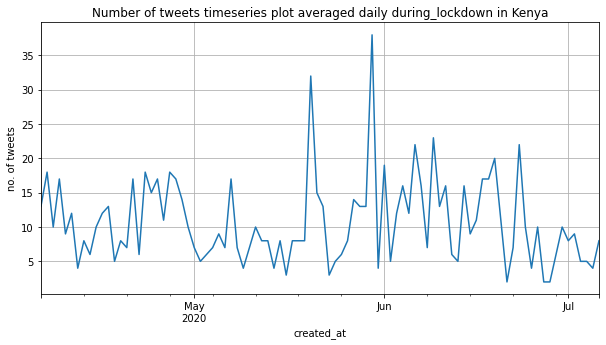

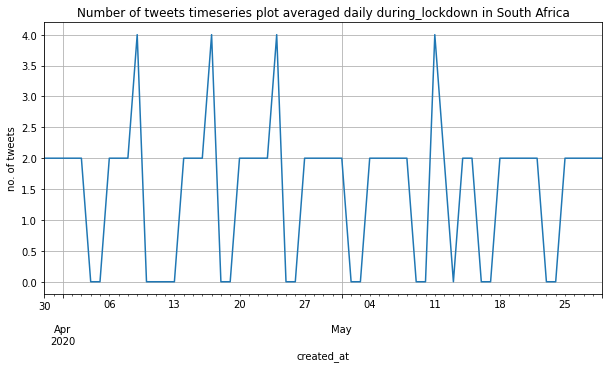

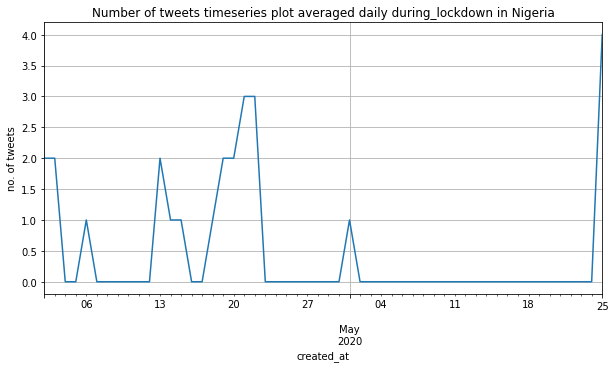

In [20]:
# daily trend_Kenya
daily_time_data = kenya_trend.text.resample('D').sum() 
plt.figure(figsize = (10,5))
plt.title('Number of tweets timeseries plot averaged daily during_lockdown in Kenya')
plt.ylabel('no. of tweets')
daily_time_data.plot()
plt.grid()

# daily trend_SA
daily_time_data = sa_trend.text.resample('D').sum() 
plt.figure(figsize = (10,5))
plt.title('Number of tweets timeseries plot averaged daily during_lockdown in South Africa')
plt.ylabel('no. of tweets')
daily_time_data.plot()
plt.grid()

# daily trend_Nigeria
daily_time_data = nigeria_trend.text.resample('D').sum() 
plt.figure(figsize = (10,5))
plt.title('Number of tweets timeseries plot averaged daily during_lockdown in Nigeria')
plt.ylabel('no. of tweets')
daily_time_data.plot()
plt.grid()

In [21]:
nigeria_monthly_time_data

created_at
2020-03-31    20
Freq: M, Name: text, dtype: int64

### Monthly trends

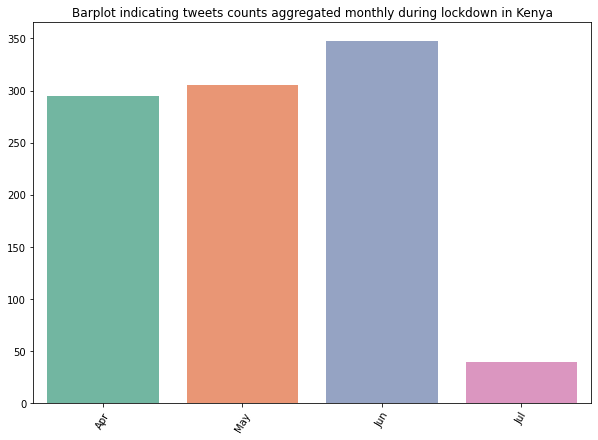

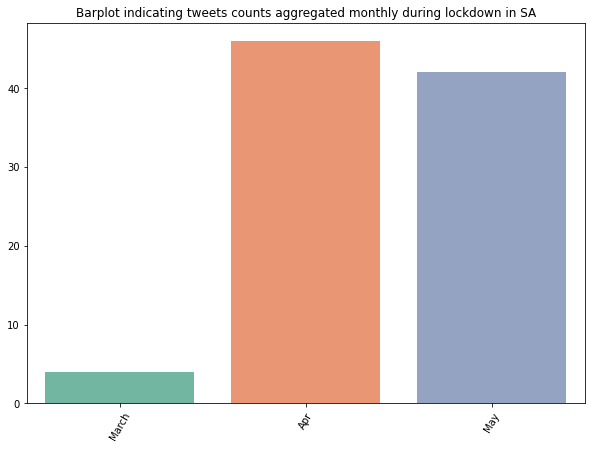

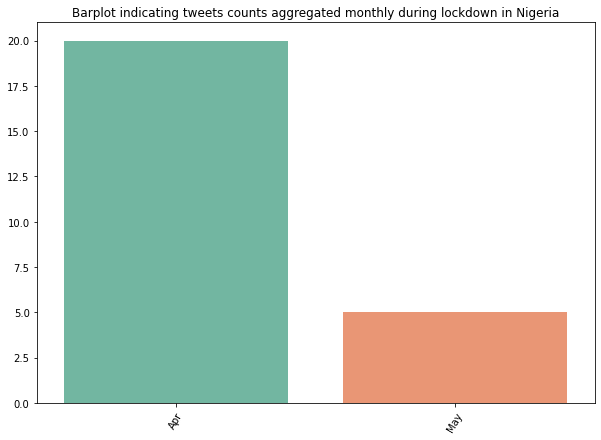

In [22]:
# number of tweets mothly aggregation using barplots
#Kenya
kenya_monthly_time_data = kenya_trend.text.resample('M').sum() 
plt.figure(figsize = (10, 7))
kenya_monthly_time_data.months = ['Apr','May', 'Jun','Jul']
plt.xticks(rotation= 60)
sns.barplot(x = kenya_monthly_time_data.months, y = kenya_monthly_time_data.values, palette = 'Set2').set_title('Barplot indicating tweets counts aggregated monthly during lockdown in Kenya')
plt.show()
#South Africa
sa_monthly_time_data = sa_trend.text.resample('M').sum() 
plt.figure(figsize = (10, 7))
sa_monthly_time_data.months = ['March','Apr','May']
plt.xticks(rotation= 60)
sns.barplot(x = sa_monthly_time_data.months, y = sa_monthly_time_data.values, palette = 'Set2').set_title('Barplot indicating tweets counts aggregated monthly during lockdown in SA')
plt.show()
#Nigeria
nigeria_monthly_time_data = nigeria_trend.text.resample('M').sum() 
plt.figure(figsize = (10, 7))
nigeria_monthly_time_data.months = ['Apr','May']
plt.xticks(rotation= 60)
sns.barplot(x = nigeria_monthly_time_data.months, y = nigeria_monthly_time_data.values, palette = 'Set2').set_title('Barplot indicating tweets counts aggregated monthly during lockdown in Nigeria')
plt.show()

## After Lockdown

In [23]:
#reading data
after_lockdown_KENYA = pd.read_csv("after_lockdown_KENYA.csv")
after_lockdown_Nigeria = pd.read_csv("after_lockdown_Nigeria.csv")
after_lockdown_SA = pd.read_csv("after_lockdown_SA.csv")


#converting created at to date time
after_lockdown_KENYA = datetime(after_lockdown_KENYA)
after_lockdown_Nigeria = datetime(after_lockdown_Nigeria)
after_lockdown_SA = datetime(after_lockdown_SA)

#Computing trend.
kenya_trend = season(after_lockdown_KENYA)
nigeria_trend = season(after_lockdown_Nigeria)
sa_trend = season(after_lockdown_SA)

### Daily trend

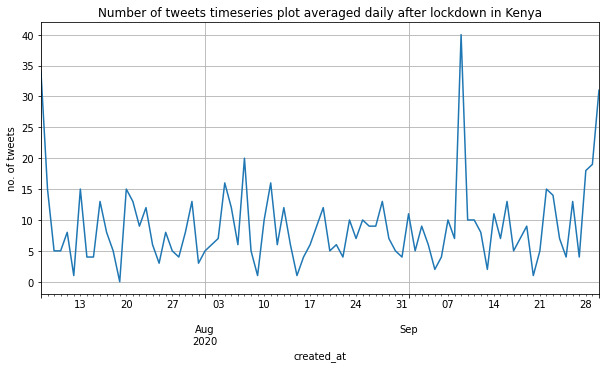

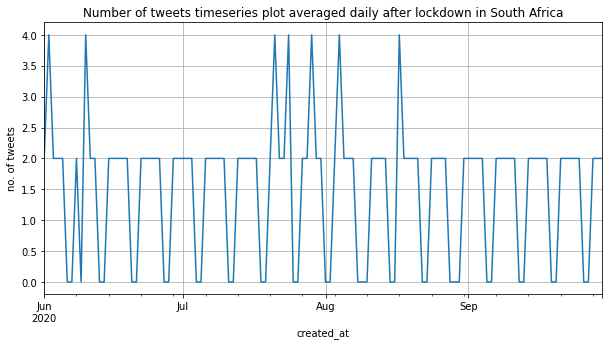

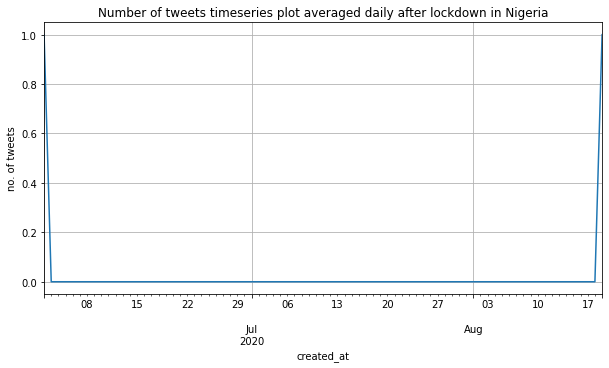

In [24]:
# daily trend_Kenya
daily_time_data = kenya_trend.text.resample('D').sum() 
plt.figure(figsize = (10,5))
plt.title('Number of tweets timeseries plot averaged daily after lockdown in Kenya')
plt.ylabel('no. of tweets')
daily_time_data.plot()
plt.grid()

# daily trend_SA
daily_time_data = sa_trend.text.resample('D').sum() 
plt.figure(figsize = (10,5))
plt.title('Number of tweets timeseries plot averaged daily after lockdown in South Africa')
plt.ylabel('no. of tweets')
daily_time_data.plot()
plt.grid()

# daily trend_Nigeria
daily_time_data = nigeria_trend.text.resample('D').sum() 
plt.figure(figsize = (10,5))
plt.title('Number of tweets timeseries plot averaged daily after lockdown in Nigeria')
plt.ylabel('no. of tweets')
daily_time_data.plot()
plt.grid()

### Monthly trend

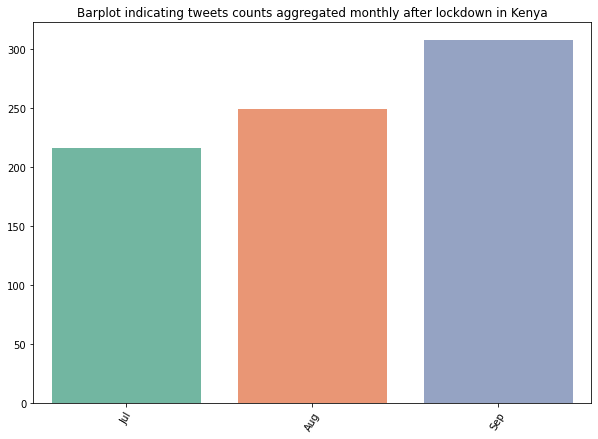

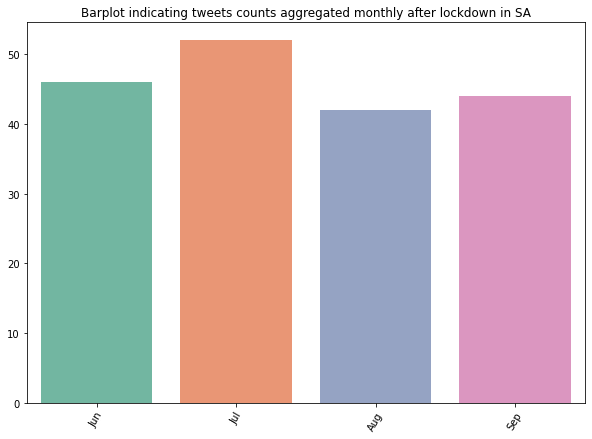

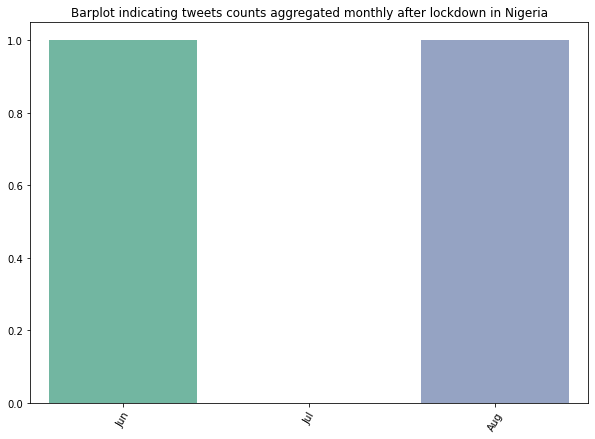

In [25]:
# number of tweets mothly aggregation using barplots
#Kenya
kenya_monthly_time_data = kenya_trend.text.resample('M').sum() 
plt.figure(figsize = (10, 7))
kenya_monthly_time_data.months = ['Jul','Aug', 'Sep']
plt.xticks(rotation= 60)
sns.barplot(x = kenya_monthly_time_data.months, y = kenya_monthly_time_data.values, palette = 'Set2').set_title('Barplot indicating tweets counts aggregated monthly after lockdown in Kenya')
plt.show()
#South Africa
sa_monthly_time_data = sa_trend.text.resample('M').sum() 
plt.figure(figsize = (10, 7))
sa_monthly_time_data.months = ['Jun','Jul','Aug', 'Sep']
plt.xticks(rotation= 60)
sns.barplot(x = sa_monthly_time_data.months, y = sa_monthly_time_data.values, palette = 'Set2').set_title('Barplot indicating tweets counts aggregated monthly after lockdown in SA')
plt.show()
#Nigeria
nigeria_monthly_time_data = nigeria_trend.text.resample('M').sum() 
plt.figure(figsize = (10, 7))
nigeria_monthly_time_data.months = ['Jun','Jul','Aug']
plt.xticks(rotation= 60)
sns.barplot(x = nigeria_monthly_time_data.months, y = nigeria_monthly_time_data.values, palette = 'Set2').set_title('Barplot indicating tweets counts aggregated monthly after lockdown in Nigeria')
plt.show()